In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset dan Informasi Awal

In [4]:
df = pd.read_csv("Downloads/DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [6]:
print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [8]:
print("Dimensi data:", df.shape)

Dimensi data: (180519, 53)


In [10]:
print(df.dtypes)

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [12]:
print(df.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000 

In [46]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Nilai Hilang:\n", missing_values[missing_values > 0])

Nilai Hilang:
 Series([], dtype: int64)


# 2. Cek Unik dan Distribusi Kolom Kategorikal

In [18]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Kolom: {col} - Jumlah unik: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False).head(5), "\n")

Kolom: Type - Jumlah unik: 4
Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64 

Kolom: Delivery Status - Jumlah unik: 4
Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64 

Kolom: Category Name - Jumlah unik: 50
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Name: count, dtype: int64 

Kolom: Customer City - Jumlah unik: 563
Customer City
Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
Name: count, dtype: int64 

Kolom: Customer Country - Jumlah unik: 2
Customer Country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64 

Kolom: Customer Email - Jumlah unik: 1
Customer Email
XXXXXXXXX    180519
Name: count, dtype: int64 

Kolom: Customer Fname - 

# 3. Korelasi Antarkolom Numerik

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


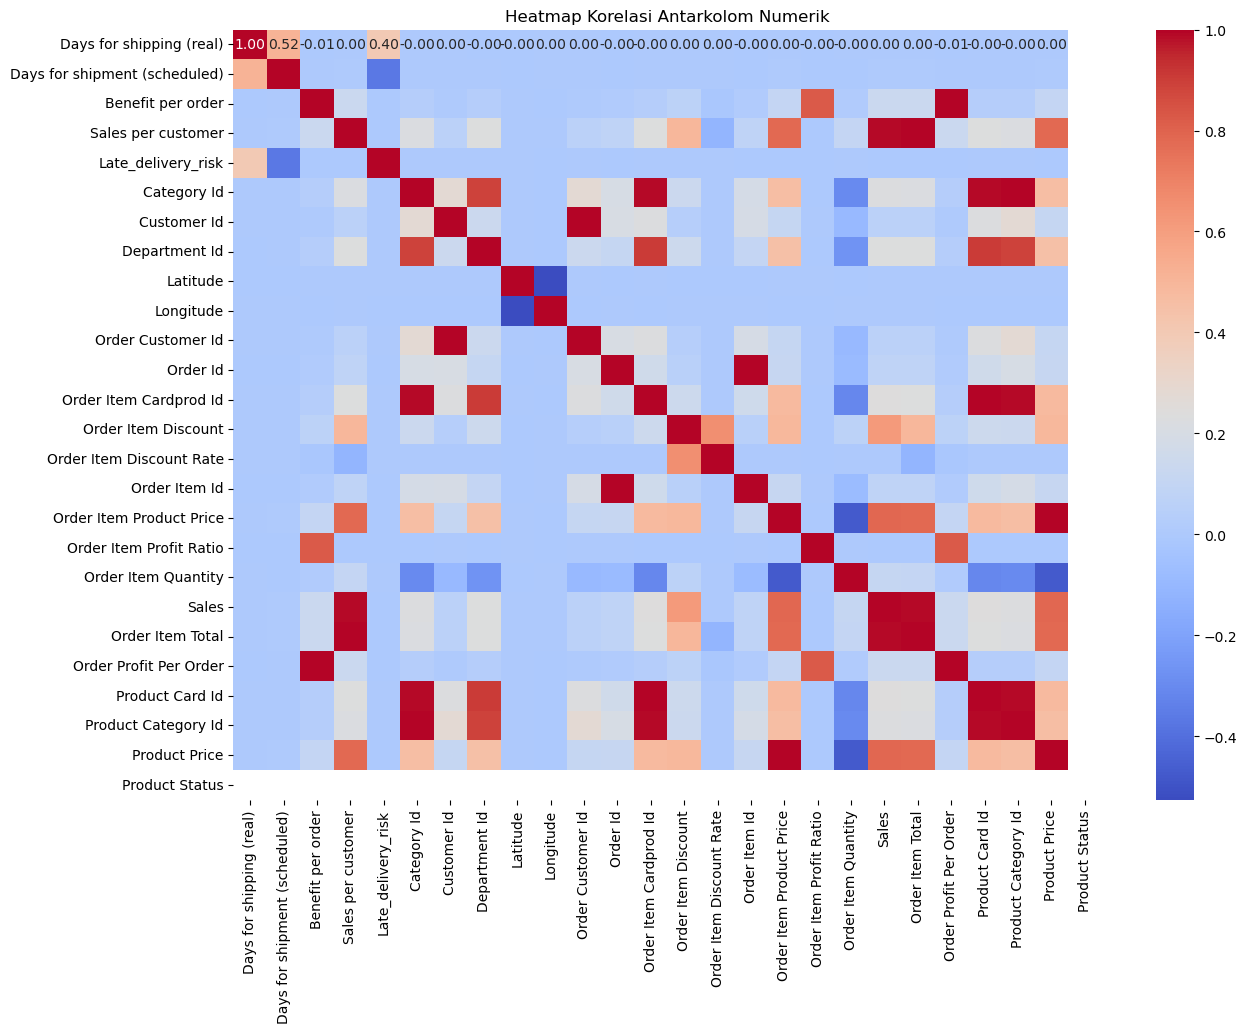

In [68]:
# 3. Korelasi Numerik
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Antarkolom Numerik")
plt.show()

# 4. Visualisasi: Distribusi & Outlier

## Histogram Beberapa Kolom Penting

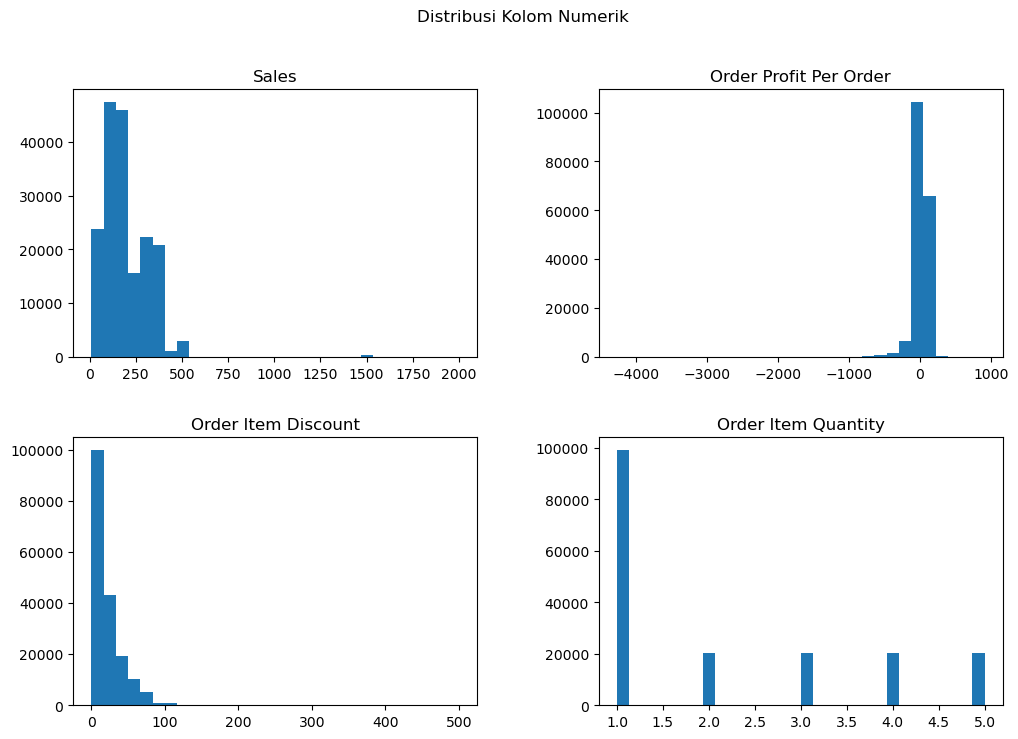

In [29]:
numeric_cols = ['Sales', 'Order Profit Per Order', 'Order Item Discount', 'Order Item Quantity']
df[numeric_cols].hist(bins=30, figsize=(12,8), grid=False)
plt.suptitle("Distribusi Kolom Numerik")
plt.show()

## Boxplot untuk deteksi outlier

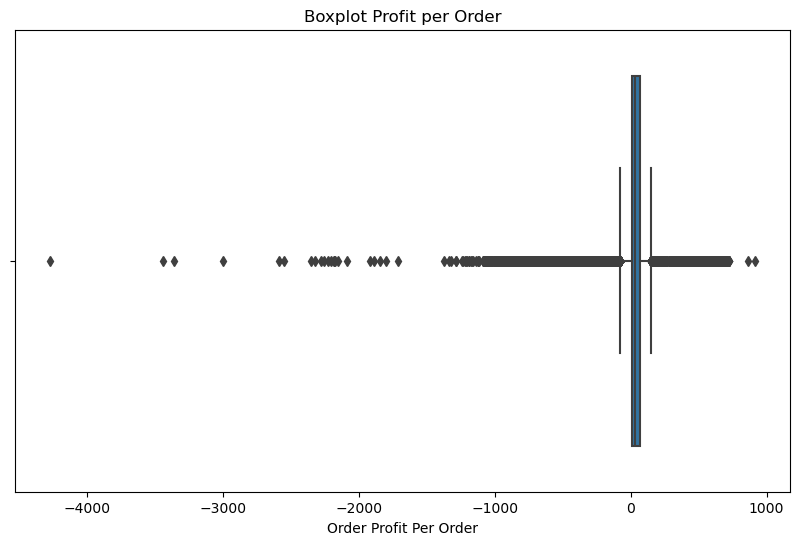

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Order Profit Per Order'])
plt.title("Boxplot Profit per Order")
plt.show()

# 5. Analisis Awal Fitur Terkait Supply Chain

## Distribusi Status Pengiriman

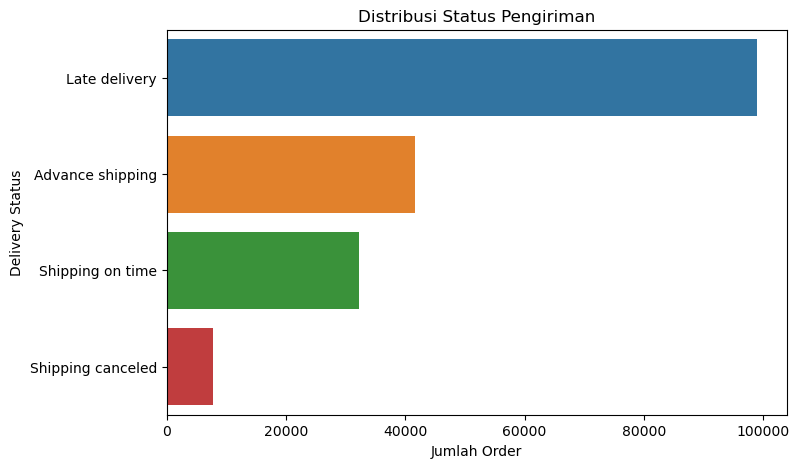

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(y='Delivery Status', data=df, order=df['Delivery Status'].value_counts().index)
plt.title("Distribusi Status Pengiriman")
plt.xlabel("Jumlah Order")
plt.show()

## Keterlambatan vs Mode Pengiriman

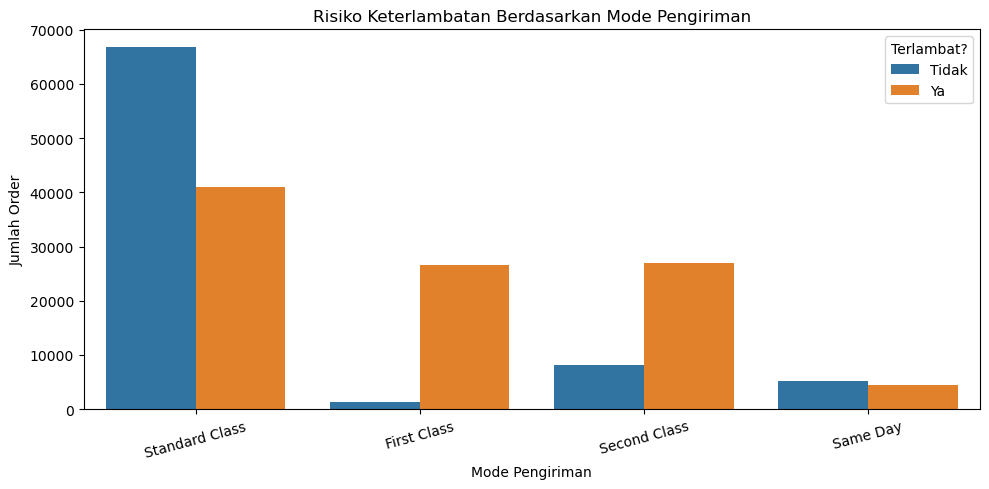

In [62]:
# Ubah nilai Late_delivery_risk ke kategori string
df['Late_delivery_label'] = df['Late_delivery_risk'].map({0: 'Tidak', 1: 'Ya'})

plt.figure(figsize=(10, 5))
sns.countplot(x='Shipping Mode', hue='Late_delivery_label', data=df)
plt.title("Risiko Keterlambatan Berdasarkan Mode Pengiriman")
plt.ylabel("Jumlah Order")
plt.xlabel("Mode Pengiriman")
plt.legend(title='Terlambat?')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 6. Ubah Kolom Tanggal ke Format Datetime

In [70]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Cek range tanggal
print("Tanggal order dari", df['order date (DateOrders)'].min(), "hingga", df['order date (DateOrders)'].max())

Tanggal order dari 2015-01-01 00:00:00 hingga 2018-01-31 23:38:00


# SUPPLY CHAIN

# 1. Analisis Struktur Rantai Pasok

## Cek Struktur Data dan Kolom Terkait

In [103]:
columns_of_interest = [
    'order date (DateOrders)', 'shipping date (DateOrders)', 'Delivery Status',
    'Late_delivery_risk', 'Category Name', 'Customer Segment',
    'Customer State', 'Customer City', 'Shipping Mode'
]

df_structure = df[columns_of_interest].copy()
df_structure.head()

,order date (DateOrders),shipping date (DateOrders),Delivery Status,Late_delivery_risk,Category Name,Customer Segment,Customer State,Customer City,Shipping Mode
0,2018-01-31 22:56:00,2018-02-03 22:56:00,Advance shipping,0,Sporting Goods,Consumer,PR,Caguas,Standard Class
1,2018-01-13 12:27:00,2018-01-18 12:27:00,Late delivery,1,Sporting Goods,Consumer,PR,Caguas,Standard Class
2,2018-01-13 12:06:00,2018-01-17 12:06:00,Shipping on time,0,Sporting Goods,Consumer,CA,San Jose,Standard Class
3,2018-01-13 11:45:00,2018-01-16 11:45:00,Advance shipping,0,Sporting Goods,Home Office,CA,Los Angeles,Standard Class
4,2018-01-13 11:24:00,2018-01-15 11:24:00,Advance shipping,0,Sporting Goods,Corporate,PR,Caguas,Standard Class


## 1.2 Pastikan Kolom Tanggal dalam Format Datetime

In [105]:
df_structure['order date (DateOrders)'] = pd.to_datetime(df_structure['order date (DateOrders)'])
df_structure['shipping date (DateOrders)'] = pd.to_datetime(df_structure['shipping date (DateOrders)'])
df_structure['Estimated Delivery Date'] = df_structure['shipping date (DateOrders)'] + pd.Timedelta(days=3)

## 1.3 Visualisasi Timeline Aliran Produk

In [108]:
df_structure['Order_to_Ship'] = (df_structure['shipping date (DateOrders)'] - df_structure['order date (DateOrders)']).dt.days
df_structure['Ship_to_Delivery'] = (df_structure['Estimated Delivery Date'] - df_structure['shipping date (DateOrders)']).dt.days
df_structure['Order_to_Delivery'] = (df_structure['Estimated Delivery Date'] - df_structure['order date (DateOrders)']).dt.days

avg_order_to_ship = df_structure['Order_to_Ship'].mean()
avg_ship_to_delivery = df_structure['Ship_to_Delivery'].mean()
avg_total = df_structure['Order_to_Delivery'].mean()

print("\n=== Rata-Rata Waktu Proses ===")
print(f"Rata-rata waktu dari Order ke Shipping: {avg_order_to_ship:.2f} hari")
print(f"Rata-rata waktu dari Shipping ke Delivery: {avg_ship_to_delivery:.2f} hari")
print(f"Total rata-rata waktu dari Order ke Delivery: {avg_total:.2f} hari")


=== Rata-Rata Waktu Proses ===
Rata-rata waktu dari Order ke Shipping: 3.47 hari
Rata-rata waktu dari Shipping ke Delivery: 3.00 hari
Total rata-rata waktu dari Order ke Delivery: 6.47 hari


## 1.4 Distribusi Kategori Produk

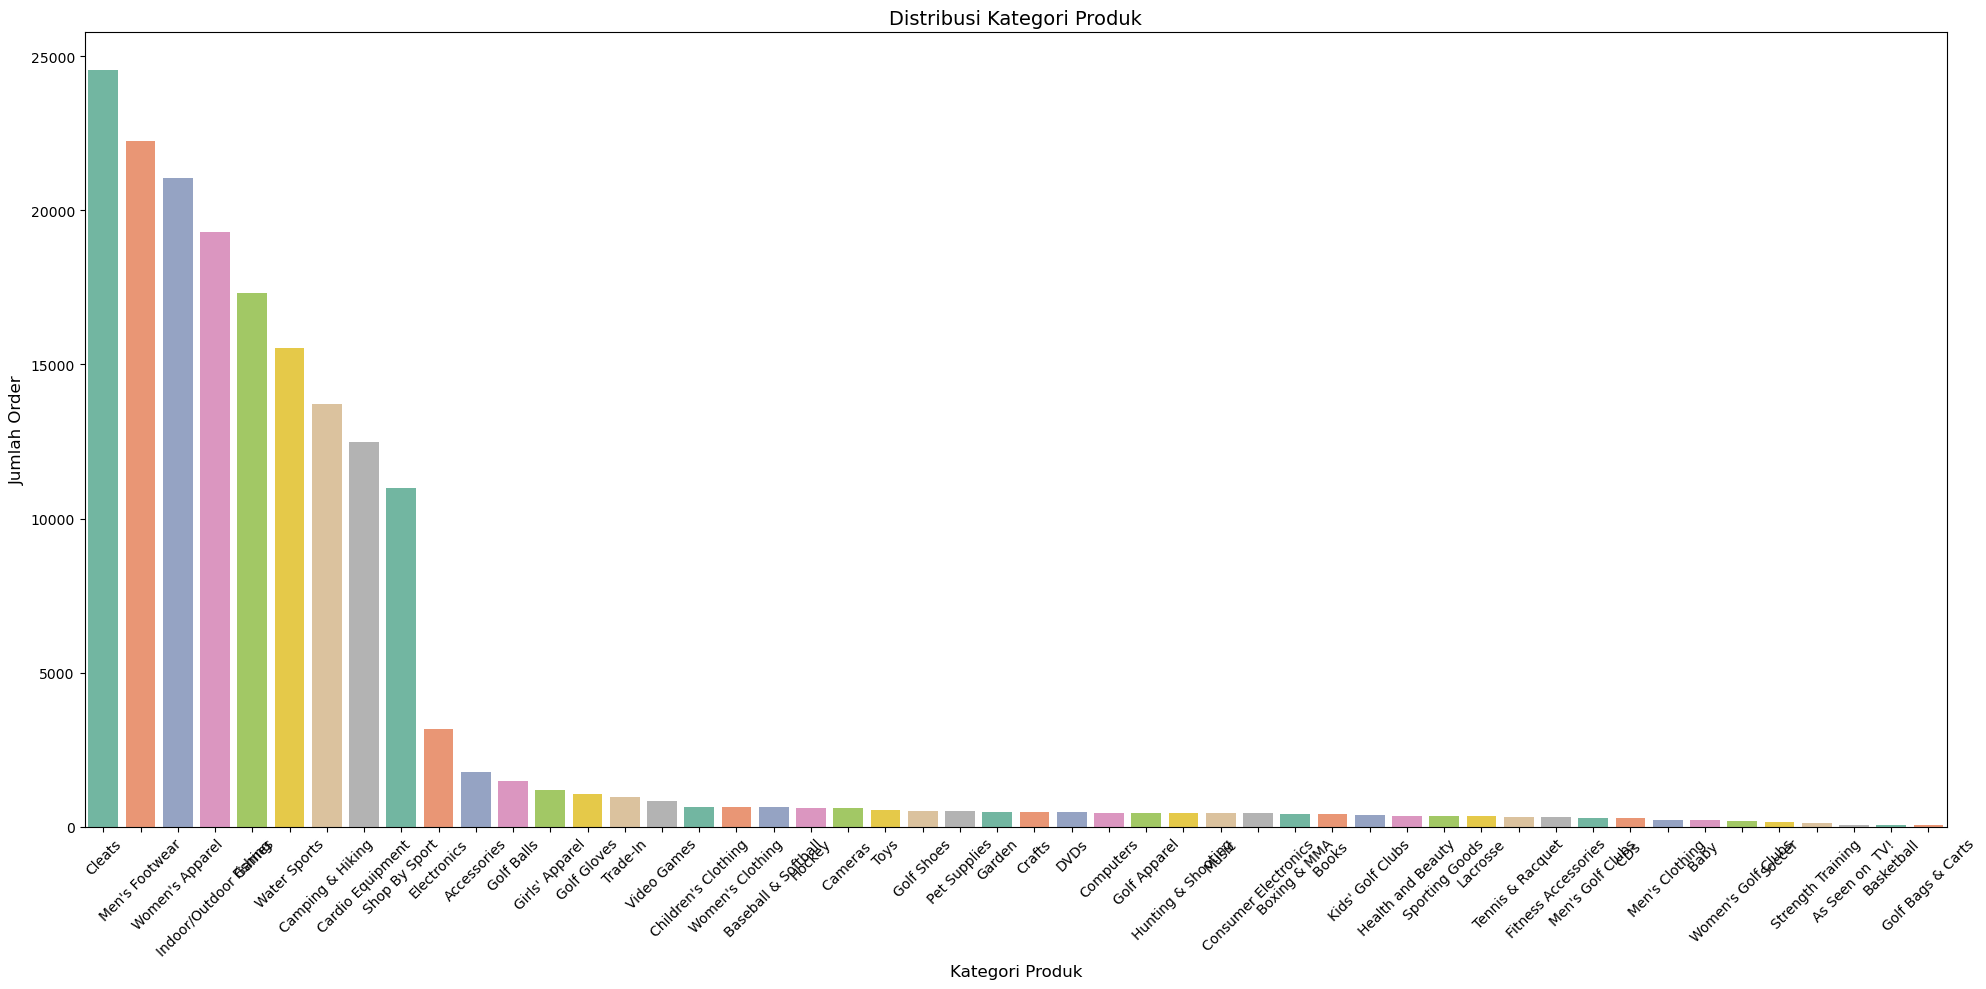

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_structure, x='Category Name', order=df_structure['Category Name'].value_counts().index, palette='Set2')
plt.title("Distribusi Kategori Produk", fontsize=14)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Jumlah Order", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.5 Distribusi Segmentasi & Lokasi Pelanggan

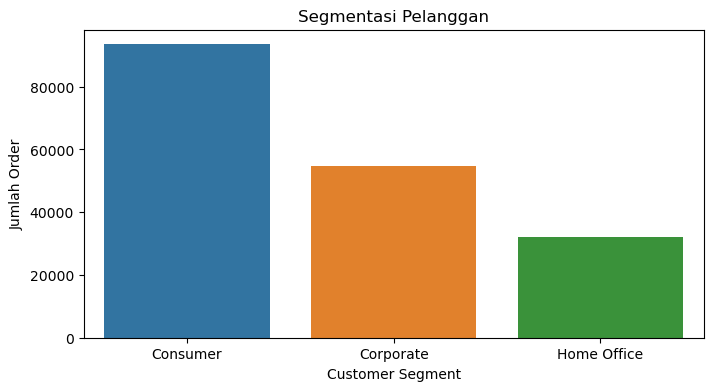

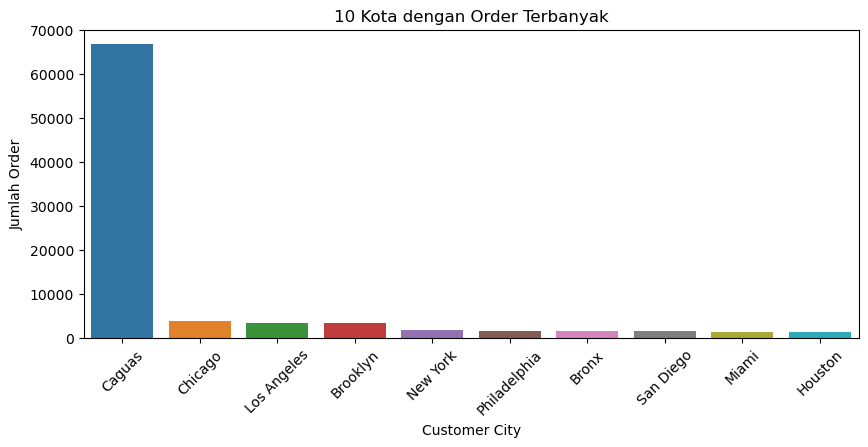

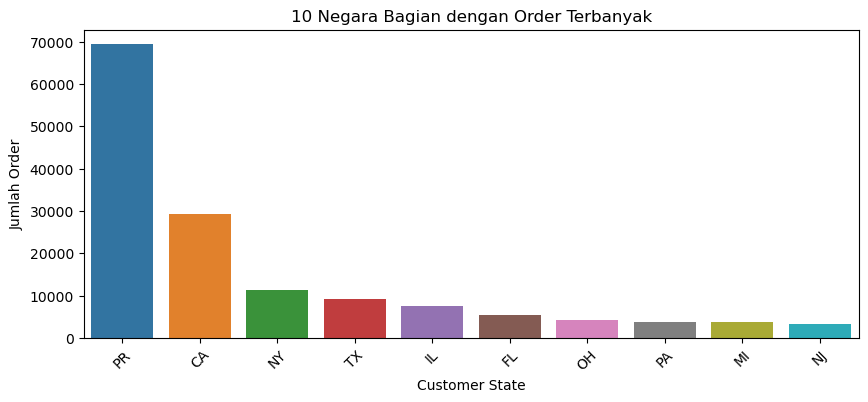

In [122]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_structure, x='Customer Segment', order=df_structure['Customer Segment'].value_counts().index)
plt.title("Segmentasi Pelanggan")
plt.ylabel("Jumlah Order")
plt.show()

top_cities = df_structure['Customer City'].value_counts().head(10)
top_states = df_structure['Customer State'].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title("10 Kota dengan Order Terbanyak")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Order")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("10 Negara Bagian dengan Order Terbanyak")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Order")
plt.show()

## 1.6 Distribusi Metode Pengiriman

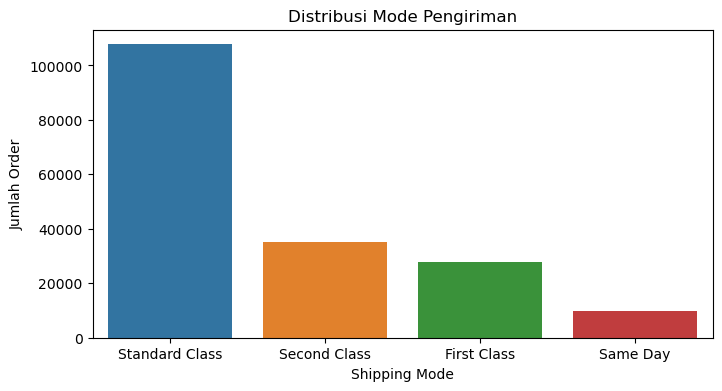

In [125]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_structure, x='Shipping Mode', order=df_structure['Shipping Mode'].value_counts().index)
plt.title("Distribusi Mode Pengiriman")
plt.ylabel("Jumlah Order")
plt.show()

## 1.7 Ringkasan Per Customer City

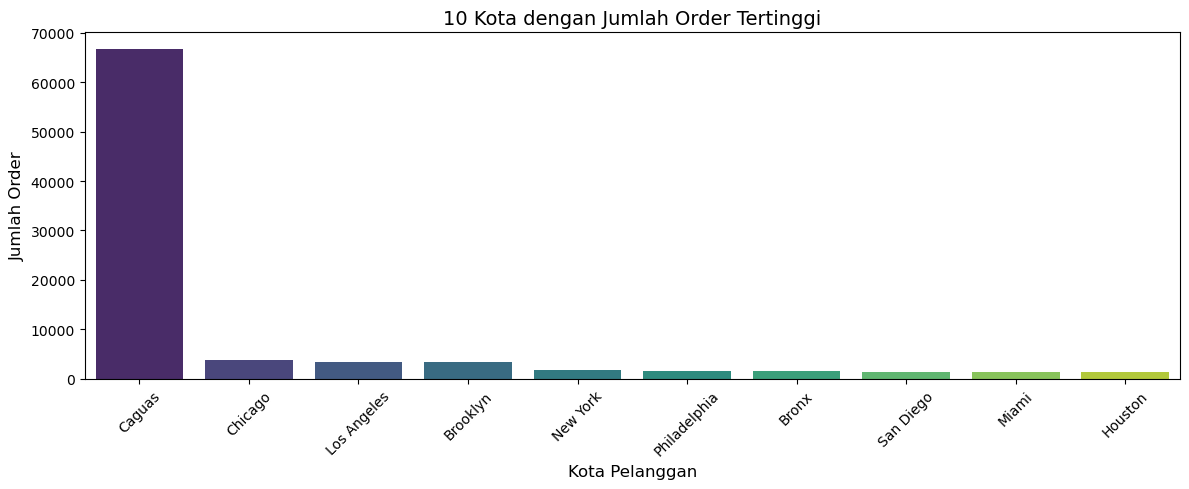

In [133]:
city_order_counts = df_structure['Customer City'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=city_order_counts.index, y=city_order_counts.values, palette="viridis")
plt.title("10 Kota dengan Jumlah Order Tertinggi", fontsize=14)
plt.xlabel("Kota Pelanggan", fontsize=12)
plt.ylabel("Jumlah Order", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Analisis Waktu Proses

## 2.1 Konversi Tanggal

In [263]:
df_structure['order date (DateOrders)'] = pd.to_datetime(df_structure['order date (DateOrders)'])
df_structure['shipping date (DateOrders)'] = pd.to_datetime(df_structure['shipping date (DateOrders)'])
df_structure['Estimated Delivery Date'] = pd.to_datetime(df_structure['Estimated Delivery Date'])

print("Sample hasil konversi kolom tanggal:")
print(df_structure[['order date (DateOrders)', 'shipping date (DateOrders)', 'Estimated Delivery Date']].head())

Sample hasil konversi kolom tanggal:
  order date (DateOrders) shipping date (DateOrders) Estimated Delivery Date
0     2018-01-31 22:56:00        2018-02-03 22:56:00     2018-02-06 22:56:00
1     2018-01-13 12:27:00        2018-01-18 12:27:00     2018-01-21 12:27:00
2     2018-01-13 12:06:00        2018-01-17 12:06:00     2018-01-20 12:06:00
3     2018-01-13 11:45:00        2018-01-16 11:45:00     2018-01-19 11:45:00
4     2018-01-13 11:24:00        2018-01-15 11:24:00     2018-01-18 11:24:00


## 2.2 Hitung Metrik Waktu Proses

In [265]:
df_structure['Order_Lead_Time'] = (df_structure['shipping date (DateOrders)'] - df_structure['order date (DateOrders)']).dt.days
df_structure['Shipping_Duration'] = (df_structure['Estimated Delivery Date'] - df_structure['shipping date (DateOrders)']).dt.days
df_structure['Total_Lead_Time'] = (df_structure['Estimated Delivery Date'] - df_structure['order date (DateOrders)']).dt.days

print("\n Sample hasil perhitungan waktu proses:")
print(df_structure[['Order_Lead_Time', 'Shipping_Duration', 'Total_Lead_Time']].head())


 Sample hasil perhitungan waktu proses:
   Order_Lead_Time  Shipping_Duration  Total_Lead_Time
0                3                  3                6
1                5                  3                8
2                4                  3                7
3                3                  3                6
4                2                  3                5


## 2.3 Visualisasi Distribusi Setiap Tahap Proses

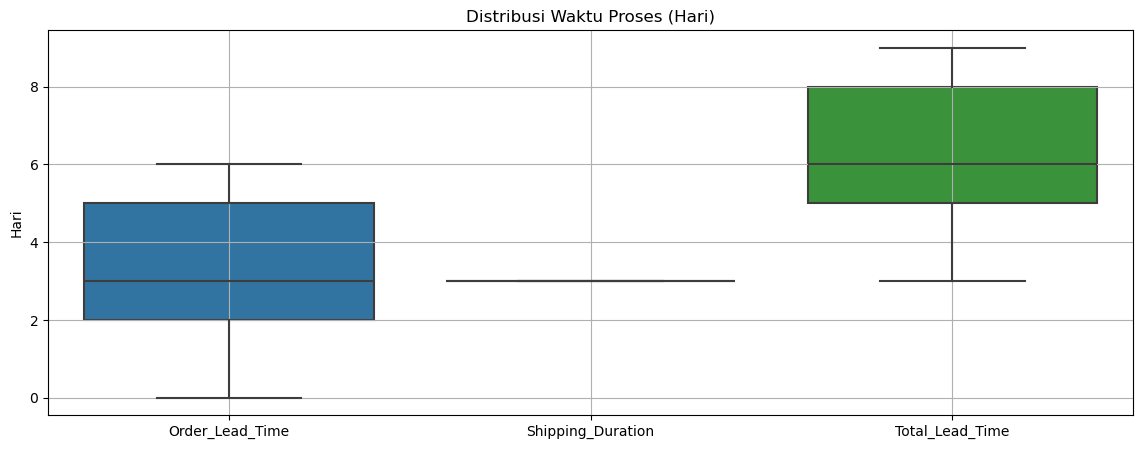

In [144]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df_structure[['Order_Lead_Time', 'Shipping_Duration', 'Total_Lead_Time']])
plt.title("Distribusi Waktu Proses (Hari)")
plt.ylabel("Hari")
plt.grid(True)
plt.show()

## 2.4 Statistik Rata-Rata dan Maksimum

In [267]:
print("⏱️ Rata-rata waktu dari Order ke Shipping (Order Lead Time):", df_structure['Order_Lead_Time'].mean(), "hari")
print("⛴️ Rata-rata waktu dari Shipping ke Delivery (Shipping Duration):", df_structure['Shipping_Duration'].mean(), "hari")
print("📦 Rata-rata total waktu dari Order ke Delivery (Total Lead Time):", df_structure['Total_Lead_Time'].mean(), "hari")

print("\n🔝 Maksimum waktu dari Order ke Delivery:", df_structure['Total_Lead_Time'].max(), "hari")

⏱️ Rata-rata waktu dari Order ke Shipping (Order Lead Time): 3.4718561481062937 hari
⛴️ Rata-rata waktu dari Shipping ke Delivery (Shipping Duration): 3.0 hari
📦 Rata-rata total waktu dari Order ke Delivery (Total Lead Time): 6.471856148106293 hari

🔝 Maksimum waktu dari Order ke Delivery: 9 hari


## 2.5 Pola Keterlambatan (Outlier & Korelasi)

🔍 Jumlah order yang sangat lama (di atas 9 hari): 0


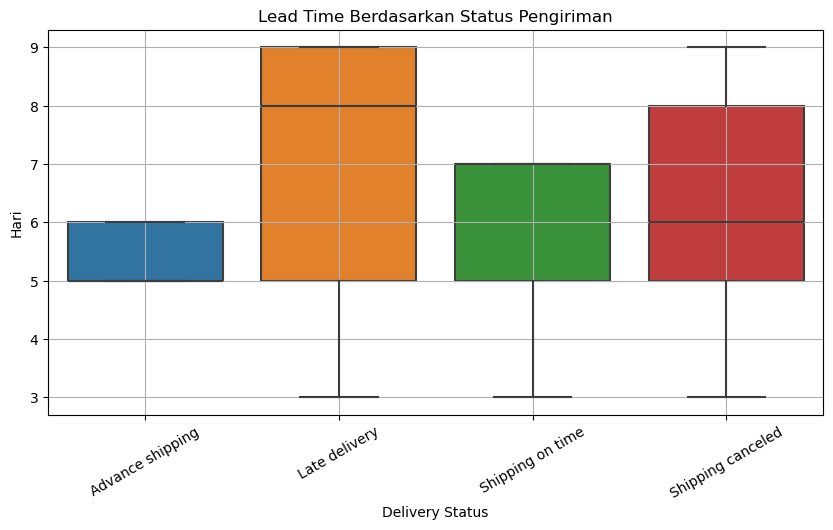

In [150]:
threshold = df_structure['Total_Lead_Time'].quantile(0.95)
late_orders = df_structure[df_structure['Total_Lead_Time'] > threshold]
print(f"🔍 Jumlah order yang sangat lama (di atas {threshold:.0f} hari): {late_orders.shape[0]}")

plt.figure(figsize=(10,5))
sns.boxplot(x='Delivery Status', y='Total_Lead_Time', data=df_structure)
plt.title("Lead Time Berdasarkan Status Pengiriman")
plt.xticks(rotation=30)
plt.ylabel("Hari")
plt.grid(True)
plt.show()

# 3. Analisis Keterlambatan Pengiriman

## 3.1 Proporsi Keterlambatan Secara Umum

In [269]:
late_counts = df_structure['Late_delivery_risk'].value_counts()
late_percentage = df_structure['Late_delivery_risk'].value_counts(normalize=True) * 100

print("Jumlah order berdasarkan keterlambatan:")
print(late_counts)

print("\n Persentase keterlambatan:")
print(late_percentage)

Jumlah order berdasarkan keterlambatan:
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

 Persentase keterlambatan:
Late_delivery_risk
1    54.829132
0    45.170868
Name: proportion, dtype: float64


## 3.2 Keterlambatan Berdasarkan Shipping Mode

In [271]:
late_by_shipping = df_structure.groupby('Shipping Mode')['Late_delivery_risk'].mean().sort_values(ascending=False) * 100

print("\n Rata-rata keterlambatan berdasarkan Shipping Mode (dalam %):")
print(late_by_shipping)


 Rata-rata keterlambatan berdasarkan Shipping Mode (dalam %):
Shipping Mode
First Class       95.322499
Second Class      76.632781
Same Day          45.743042
Standard Class    38.071683
Name: Late_delivery_risk, dtype: float64


## 3.3 Keterlambatan Berdasarkan Customer State

In [273]:
late_by_state = df_structure.groupby('Customer State')['Late_delivery_risk'].mean().sort_values(ascending=False) * 100

print("\n Rata-rata keterlambatan berdasarkan Customer State (dalam %):")
print(late_by_state.head(10))


 Rata-rata keterlambatan berdasarkan Customer State (dalam %):
Customer State
NM    60.273973
DE    60.223048
OK    59.482759
AR    57.926829
DC    57.858377
MN    56.994048
SC    56.992481
MD    56.935818
ND    56.744186
NC    56.576305
Name: Late_delivery_risk, dtype: float64


## 3.4 Keterlambatan Berdasarkan Kategori Produk

In [275]:
late_by_category = df_structure.groupby('Category Name')['Late_delivery_risk'].mean().sort_values(ascending=False) * 100

print("\n Rata-rata keterlambatan berdasarkan Kategori Produk (dalam %):")
print(late_by_category)


 Rata-rata keterlambatan berdasarkan Kategori Produk (dalam %):
Category Name
Golf Bags & Carts       68.852459
Lacrosse                60.058309
Pet Supplies            58.943089
Cameras                 58.108108
Strength Training       57.657658
As Seen on  TV!         57.352941
Music                   57.142857
Accessories             56.966292
Fitness Accessories     56.957929
Books                   56.543210
Women's Clothing        56.461538
Boxing & MMA            56.264775
Golf Gloves             56.261682
Hunting & Shooting      56.136364
Electronics             56.083650
Crafts                  55.991736
Health and Beauty       55.801105
Tennis & Racquet        55.792683
Garden                  55.785124
Trade-In                55.646817
Golf Shoes              55.534351
Sporting Goods          55.462185
Girls' Apparel          55.287261
Basketball              55.223881
Baseball & Softball     55.221519
Consumer Electronics    55.220418
Shop By Sport           55.152950
Toy

## 3.5 Distribusi Keterlambatan Secara Waktu (Bulanan / Tahunan)

In [277]:
df_structure['Order_Year'] = df_structure['order date (DateOrders)'].dt.year
df_structure['Order_Month'] = df_structure['order date (DateOrders)'].dt.month

monthly_late = df_structure.groupby(['Order_Year', 'Order_Month'])['Late_delivery_risk'].mean() * 100

print("\n Persentase keterlambatan per bulan-tahun:")
print(monthly_late.tail(12))


 Persentase keterlambatan per bulan-tahun:
Order_Year  Order_Month
2017        2              54.667754
            3              55.264634
            4              53.779739
            5              53.470002
            6              53.504343
            7              54.776232
            8              56.437323
            9              54.230102
            10             53.658537
            11             55.085158
            12             55.178908
2018        1              56.288271
Name: Late_delivery_risk, dtype: float64


# 4. Analisis Kinerja Berdasarkan Customer City 

## 4.1 Jumlah Order per Kota

In [279]:
city_order_counts = df_structure['Customer City'].value_counts().head(10)

print("10 Kota dengan Jumlah Order Terbanyak:")
print(city_order_counts)

10 Kota dengan Jumlah Order Terbanyak:
Customer City
Caguas          66770
Chicago          3885
Los Angeles      3417
Brooklyn         3412
New York         1816
Philadelphia     1577
Bronx            1500
San Diego        1437
Miami            1314
Houston          1297
Name: count, dtype: int64


## 4.2 Rata-rata Keterlambatan per Kota

In [281]:
city_delay_rate = df_structure.groupby('Customer City')['Late_delivery_risk'].mean().sort_values(ascending=False).head(10) * 100

print("\n 10 Kota dengan Rata-rata Keterlambatan Tertinggi (%):")
print(city_delay_rate)


 10 Kota dengan Rata-rata Keterlambatan Tertinggi (%):
Customer City
Denton               81.318681
Marion               79.411765
Medina               78.666667
Sumner               78.571429
Garland              77.272727
Roseville            77.235772
Revere               76.923077
Lithonia             75.409836
Arlington Heights    74.242424
Lawton               73.809524
Name: Late_delivery_risk, dtype: float64


## 4.3 Rata-rata Lead Time per Kota

In [283]:
city_lead_time = df_structure.groupby('Customer City')['Total_Lead_Time'].mean().sort_values(ascending=False).head(10)

print("\n 10 Kota dengan Rata-rata Waktu Pengiriman Tertinggi (Total Lead Time):")
print(city_lead_time)


 10 Kota dengan Rata-rata Waktu Pengiriman Tertinggi (Total Lead Time):
Customer City
Marion               7.588235
Arlington Heights    7.378788
Clarksville          7.302083
Lynn                 7.204545
Peoria               7.200000
Denton               7.175824
Lodi                 7.166667
Clementon            7.109890
Methuen              7.104839
San Ramon            7.087302
Name: Total_Lead_Time, dtype: float64


# 5. Alternatif Solusi untuk Analisis Biaya & Efisiensi Keuangan

## 5. 1 Estimasi Biaya Berdasarkan Shipping Duration & Mode

Rata-rata Shipping Duration per Shipping Mode:
Shipping Mode
First Class       3.0
Same Day          3.0
Second Class      3.0
Standard Class    3.0
Name: Shipping_Duration, dtype: float64


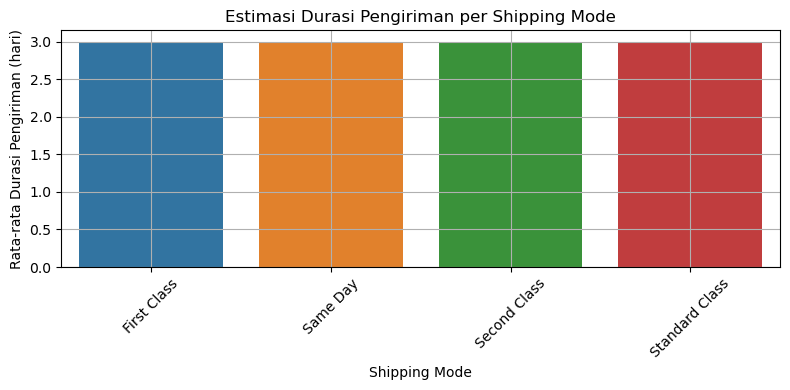

In [285]:
shipping_cost_proxy = df_structure.groupby('Shipping Mode')['Shipping_Duration'].mean().sort_values(ascending=False)

print("Rata-rata Shipping Duration per Shipping Mode:")
print(shipping_cost_proxy)

plt.figure(figsize=(8, 4))
sns.barplot(x=shipping_cost_proxy.index, y=shipping_cost_proxy.values)
plt.title("Estimasi Durasi Pengiriman per Shipping Mode")
plt.ylabel("Rata-rata Durasi Pengiriman (hari)")
plt.xlabel("Shipping Mode")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.2 Identifikasi Shipping Mode Paling Tidak Efisien

In [287]:
inefficiency_df = df_structure.groupby('Shipping Mode').agg({
    'Shipping_Duration': 'mean',
    'Late_delivery_risk': 'mean'
}).sort_values(by='Late_delivery_risk', ascending=False)

inefficiency_df['Late_delivery_risk (%)'] = inefficiency_df['Late_delivery_risk'] * 100

print("Shipping Mode dengan risiko keterlambatan tinggi dan durasi lama:")
print(inefficiency_df[['Shipping_Duration', 'Late_delivery_risk (%)']])

Shipping Mode dengan risiko keterlambatan tinggi dan durasi lama:
                Shipping_Duration  Late_delivery_risk (%)
Shipping Mode                                            
First Class                   3.0               95.322499
Second Class                  3.0               76.632781
Same Day                      3.0               45.743042
Standard Class                3.0               38.071683


## 5.3 Margin Efisiensi Berdasarkan Kategori Produk (Proxy Time-Based)

Rata-rata Total Lead Time per Kategori Produk:
Category Name
Strength Training       6.729730
Soccer                  6.688406
As Seen on  TV!         6.617647
DVDs                    6.616977
Kids' Golf Clubs        6.609375
Computers               6.608597
Lacrosse                6.591837
Children's Clothing     6.588957
Crafts                  6.566116
Video Games             6.562053
Women's Golf Clubs      6.552486
Trade-In                6.551335
Fitness Accessories     6.546926
Tennis & Racquet        6.530488
Golf Gloves             6.527103
Golf Apparel            6.512472
Women's Clothing        6.507692
Toys                    6.499055
Girls' Apparel          6.482931
Cleats                  6.480795
Fishing                 6.477460
Golf Balls              6.477288
Men's Footwear          6.476086
Accessories             6.474157
Camping & Hiking        6.472795
Cardio Equipment        6.470970
Indoor/Outdoor Games    6.468028
Shop By Sport           6.467771
Garden         

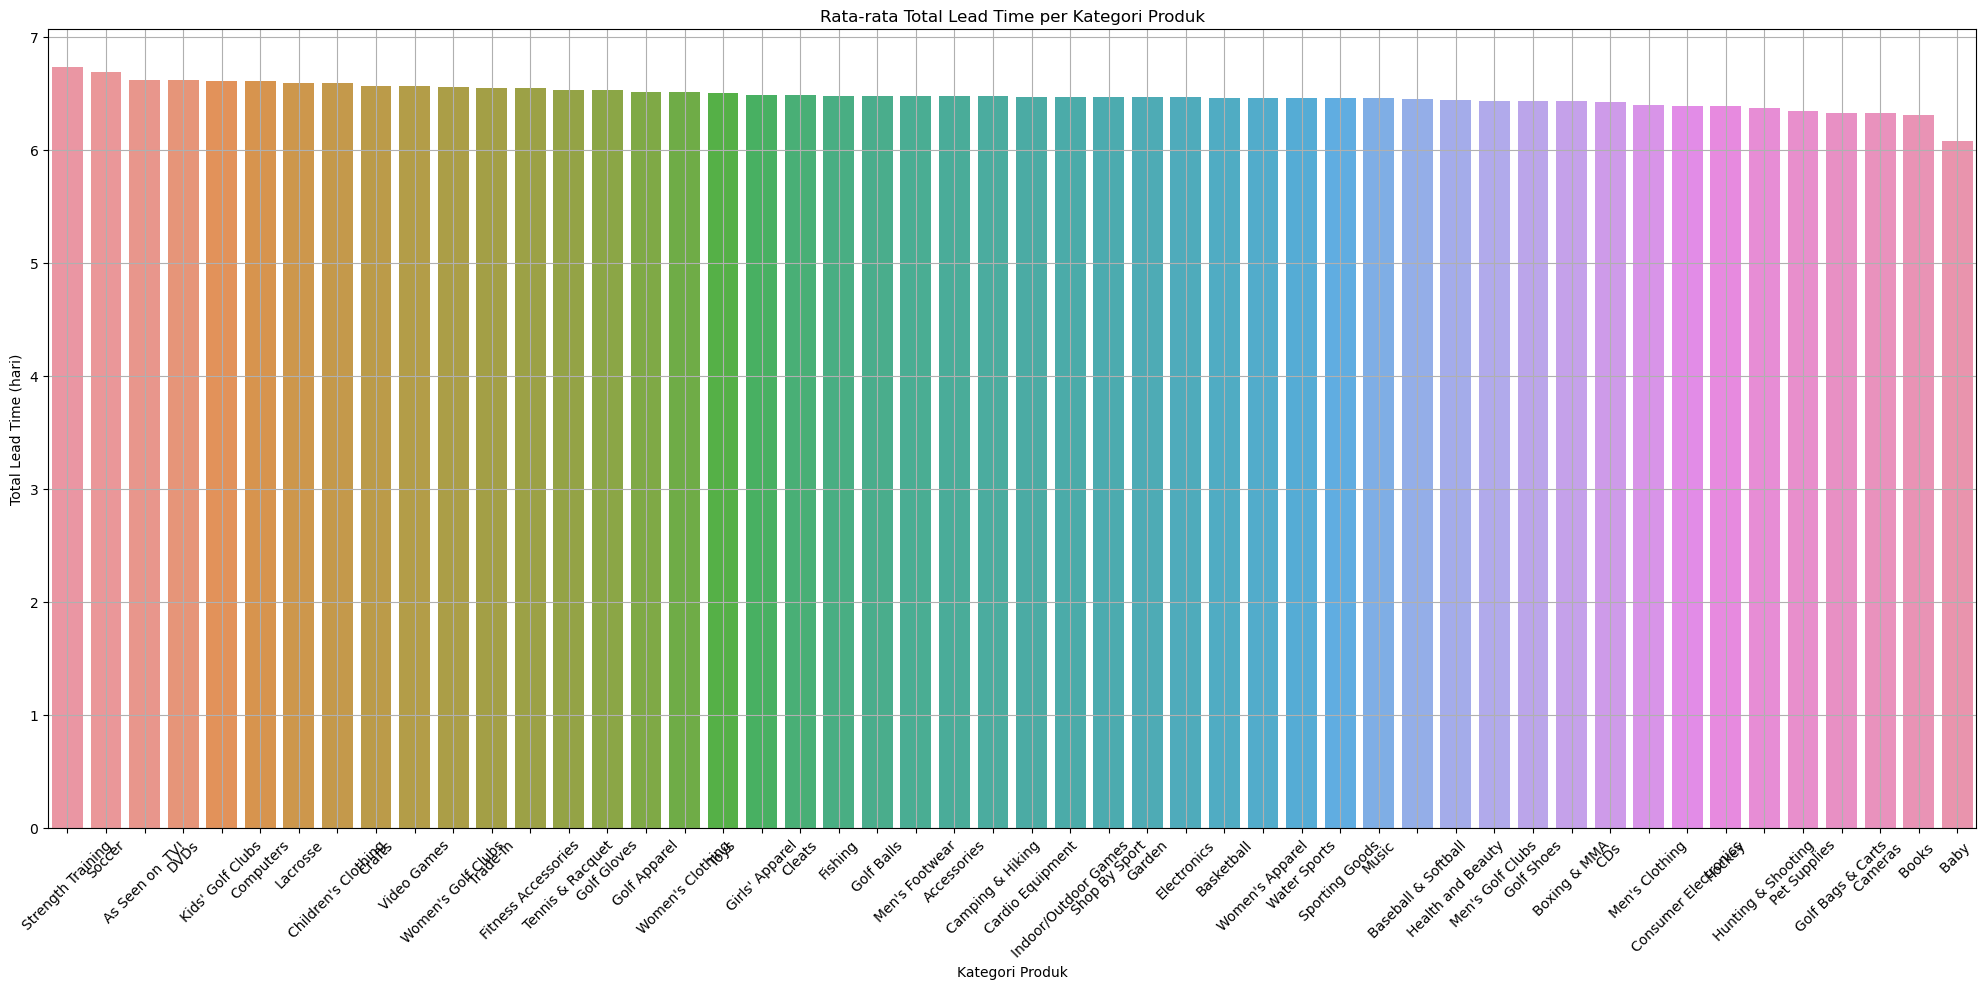

In [289]:
category_efficiency = df_structure.groupby('Category Name')['Total_Lead_Time'].mean().sort_values(ascending=False)

print("Rata-rata Total Lead Time per Kategori Produk:")
print(category_efficiency)

plt.figure(figsize=(20, 10))
sns.barplot(x=category_efficiency.index, y=category_efficiency.values)
plt.title("Rata-rata Total Lead Time per Kategori Produk")
plt.ylabel("Total Lead Time (hari)")
plt.xlabel("Kategori Produk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# 6. Analisis Permintaan & Tren Order

## 6.1 Time Series Jumlah Order per Bulan

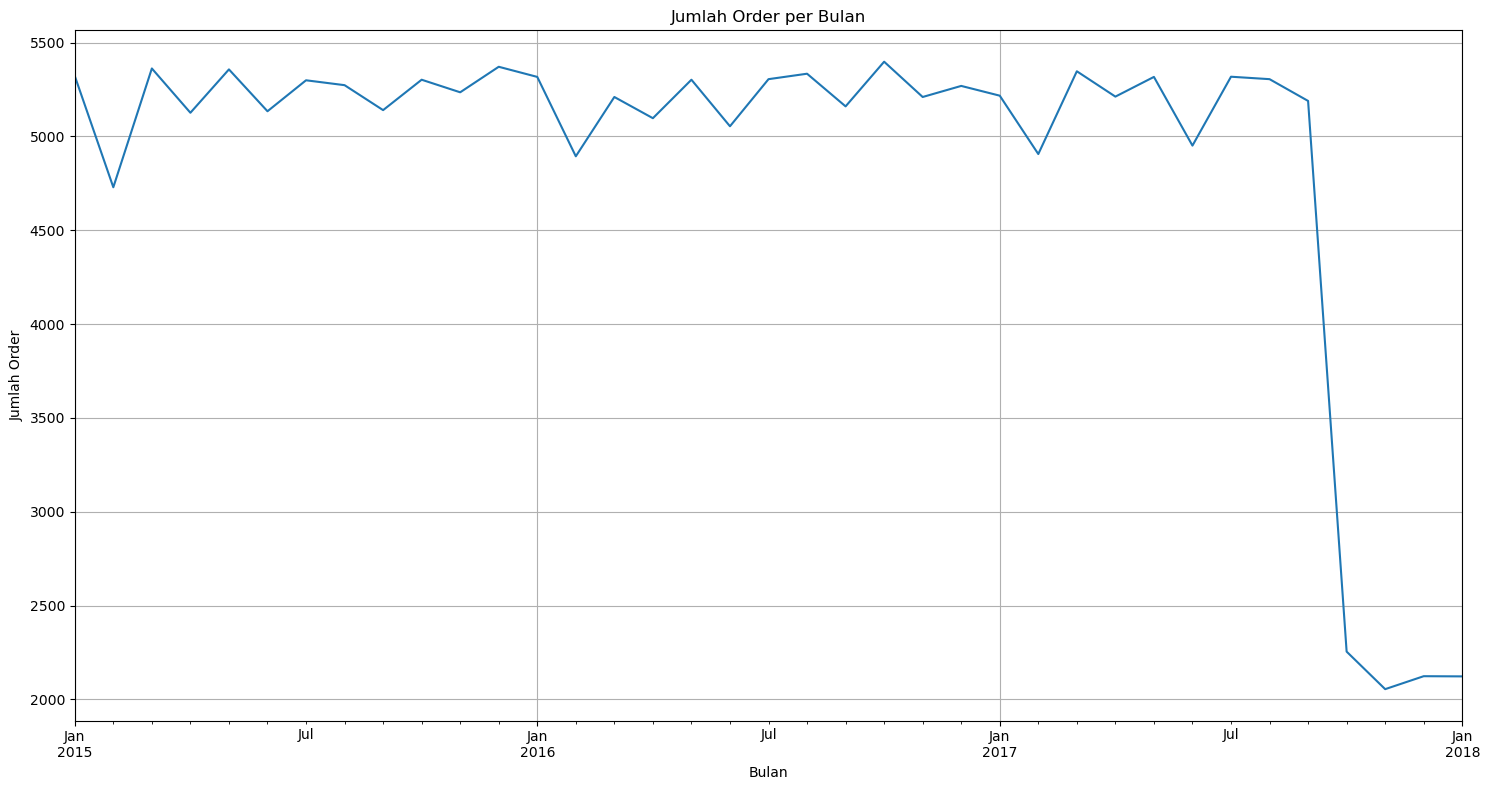

Rata-rata jumlah order per bulan:
count      37.000000
mean     4878.891892
std       978.510171
min      2055.000000
25%      5097.000000
50%      5217.000000
75%      5317.000000
max      5398.000000
dtype: float64


In [293]:
plt.figure(figsize=(15, 8))
orders_per_month.plot()
plt.title("Jumlah Order per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Rata-rata jumlah order per bulan:")
print(orders_per_month.describe())

## 6.2 Musiman: Jumlah Order per Bulan & Kuartal

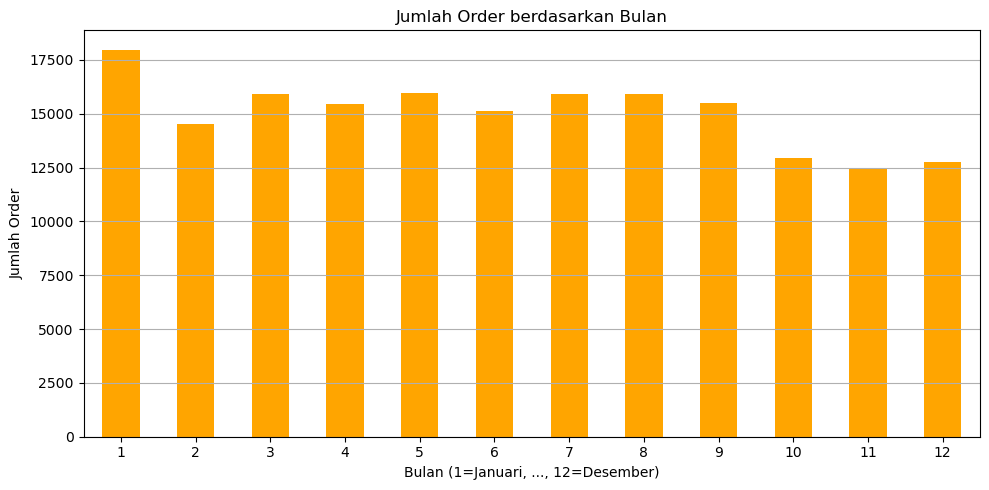

Jumlah order per bulan:
Order_Month
1     17979
2     14529
3     15919
4     15435
5     15976
6     15139
7     15922
8     15912
9     15489
10    12955
11    12500
12    12764
Name: count, dtype: int64


In [295]:
monthly_orders = df_structure['Order_Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='bar', color='orange')
plt.title("Jumlah Order berdasarkan Bulan")
plt.xlabel("Bulan (1=Januari, ..., 12=Desember)")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Jumlah order per bulan:")
print(monthly_orders)

## 6.3 Segmentasi Wilayah: Jumlah Order per Customer State

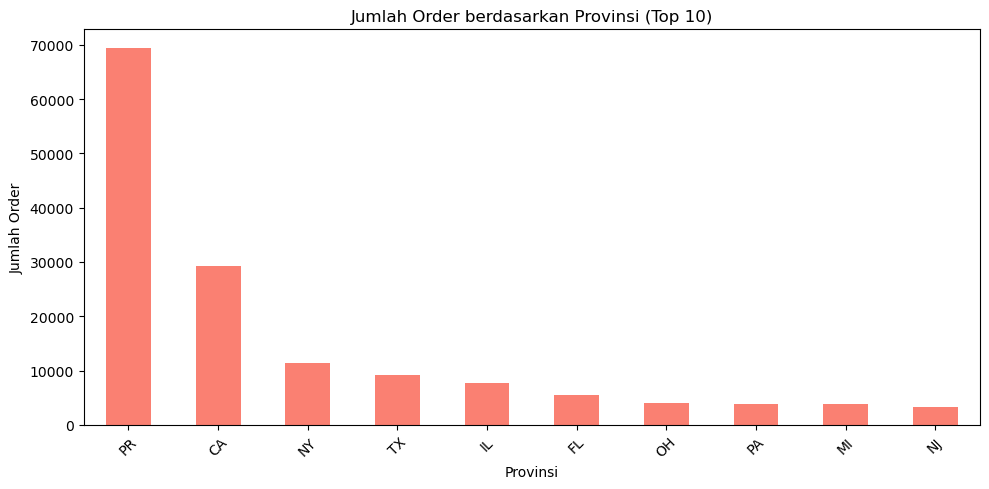

Top 10 wilayah dengan jumlah order terbanyak:
Customer State
PR    69373
CA    29223
NY    11327
TX     9103
IL     7631
FL     5456
OH     4095
PA     3824
MI     3804
NJ     3191
Name: count, dtype: int64


In [297]:
state_orders = df_structure['Customer State'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
state_orders.plot(kind='bar', color='salmon')
plt.title("Jumlah Order berdasarkan Provinsi (Top 10)")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 wilayah dengan jumlah order terbanyak:")
print(state_orders)

## 6.4 Produk Paling Banyak Dipesan (berdasarkan Category Name)

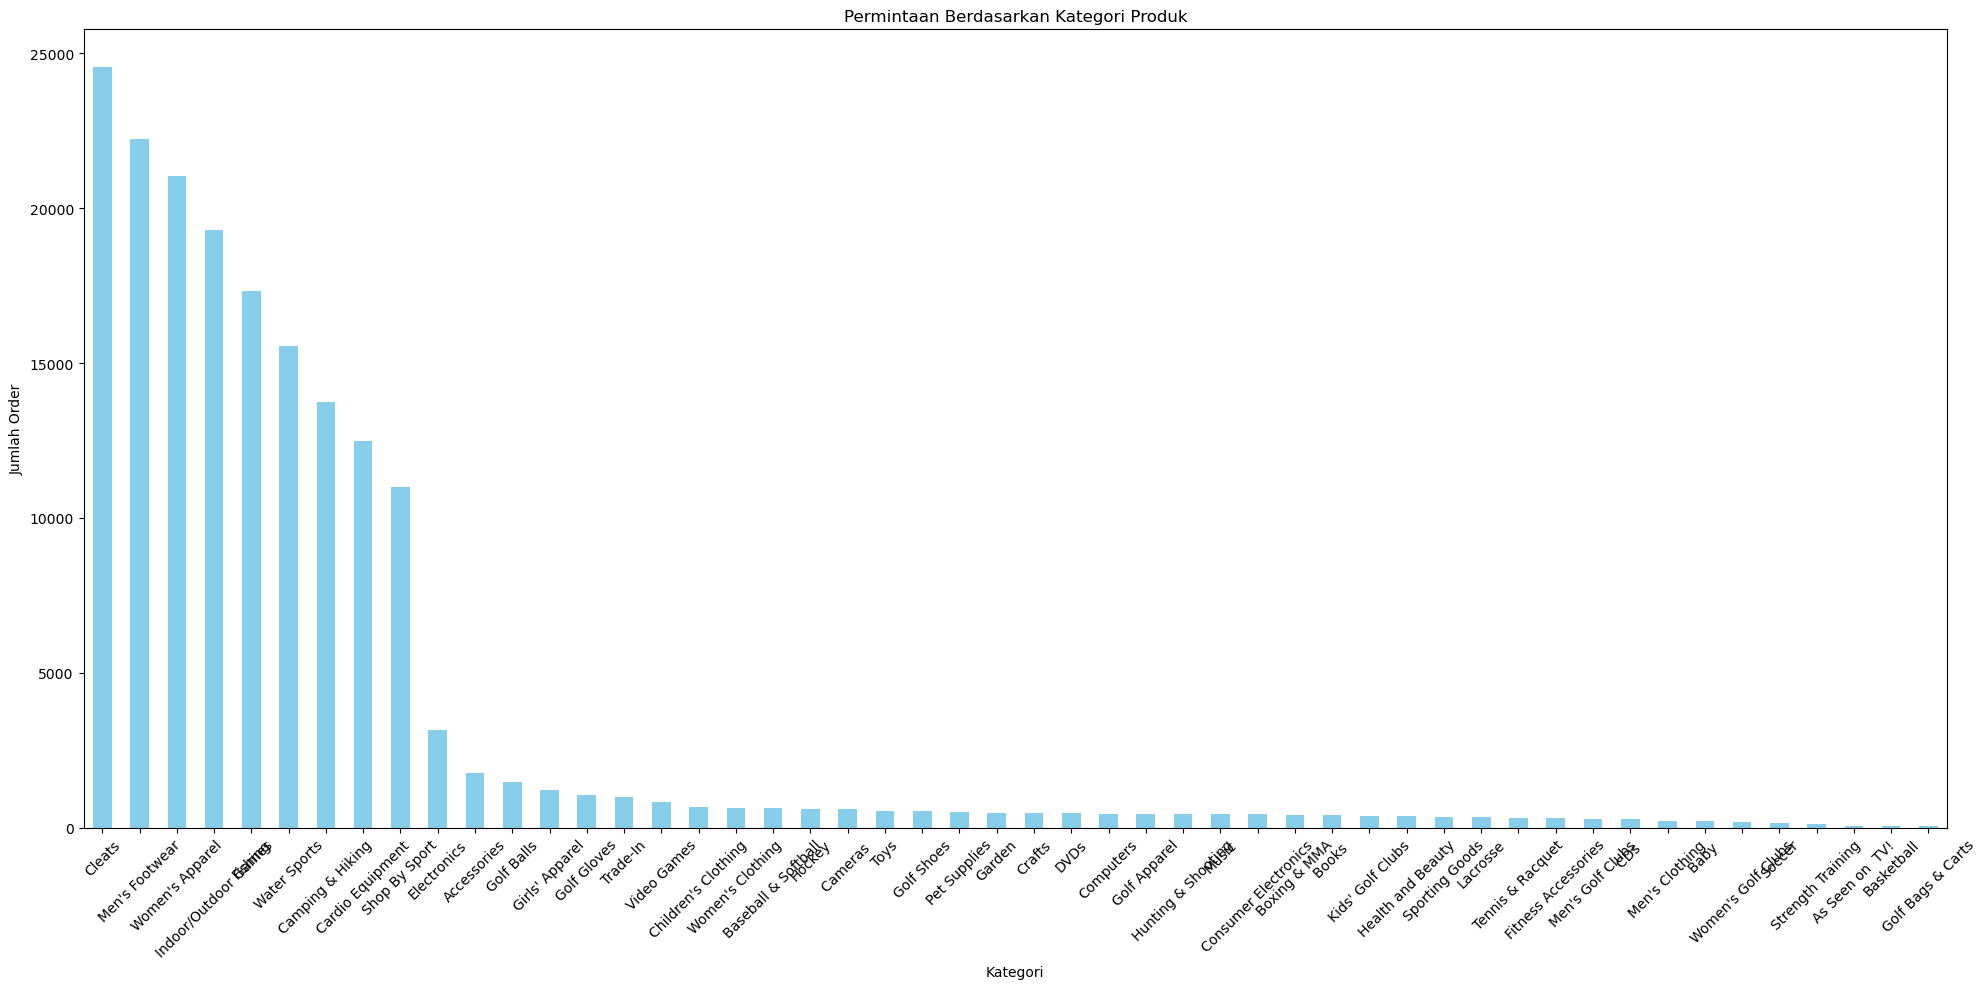

Jumlah order per kategori produk:
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics  

In [299]:
product_demand = df_structure['Category Name'].value_counts()

plt.figure(figsize=(20, 10))
product_demand.plot(kind='bar', color='skyblue')
plt.title("Permintaan Berdasarkan Kategori Produk")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Jumlah order per kategori produk:")
print(product_demand)